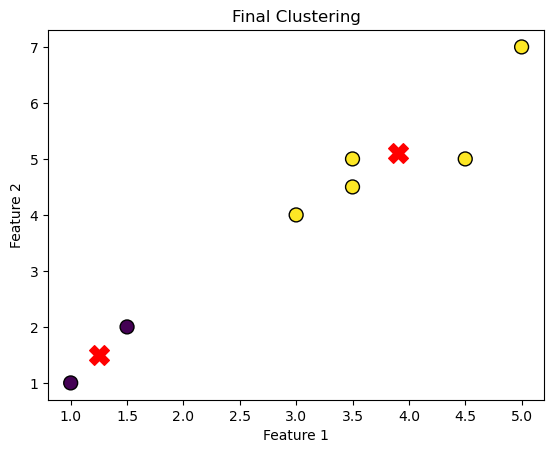

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Generate sample data
X = np.array([[1.0, 1.0], [1.5, 2.0], [3.0, 4.0], [5.0, 7.0], [3.5, 5.0], [4.5, 5.0], [3.5, 4.5]])

def initialize_centroids(X, K):
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

def find_closest_centroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    idx = np.zeros(m, dtype=int)
    
    for i in range(m):
        distances = np.sum((X[i] - centroids)**2, axis=1)
        idx[i] = np.argmin(distances)
    
    return idx

def compute_centroids(X, idx, K):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0) if len(points) > 0 else np.zeros(n)
    
    return centroids

def k_means(X, K, max_iters=10):
    centroids = initialize_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
        if np.all(centroids == previous_centroids):
            break
        previous_centroids = centroids
    return centroids, idx

def plot_k_means(X, centroids, idx, K, title):
    plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Run K-Means
K = 2
centroids, idx = k_means(X, K)
plot_k_means(X, centroids, idx, K, "Final Clustering")